### <center> Lesson 2 - Data Manipulation

#### 2.1 Pandas

First we begin by "calling" all relevant modules that we will be using. Such as numpy(the math package) and pandas(the dataframe package).

In [1]:
import numpy as np
import pandas as pd

We can then read our dataset(.csv) by calling the read_csv() function from pandas. Pandas can also read:

Excel Spreadsheet - read_excel(), 
SAS datafiles - read_sas(), 
SQL - read_sql(), 
and many more!

In [2]:
df = pd.read_csv('Auto_Insurance_Claims.csv')

Now we can take a peek into our dataset using the head() function which shows us the 1st 5 lines.
We can also specify the number of rows we want to peek at by specifying the number eg. head(12)

In [3]:
df.head()

,Customer,State Code,Coverage,Education,Accident Date,Report Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Policy Type,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,KS,Basic,Bachelor,9/8/2013,8/12/2016,Employed,F,56274.0,Suburban,Married,Corporate Auto,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,NE,Extended,Bachelor,15/1/2017,29/6/2017,Unemployed,F,0.0,Suburban,Single,Personal Auto,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,OK,Premium,Bachelor,28/4/2010,5/7/2016,Employed,F,48767.0,Suburban,Married,Personal Auto,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,MO,NaN,Bachelor,3/7/2015,19/4/2017,Unemployed,M,0.0,Suburban,Married,Corporate Auto,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,KS,NaN,Bachelor,30/8/2017,12/9/2017,Employed,M,43836.0,Rural,Single,Personal Auto,Collision,Agent,138.130879,Four-Door Car,Medsize


It is easy to get the names of all our columns easily using the columns attribute of our dataframe as follows

In [4]:
df.columns

Index(['Customer', 'State Code', 'Coverage', 'Education', 'Accident Date',
       'Report Date', 'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Policy Type', 'Claim Reason', 'Sales Channel',
       'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

We can also wrap df.columns with list() to present the column names in a list as follows:

In [5]:
list(df.columns)

['Customer',
 'State Code',
 'Coverage',
 'Education',
 'Accident Date',
 'Report Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Claim Reason',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

It is always a good idea to start our data preparation step by getting an idea of the size of our dataset. We do that by calling the shape attribute

In [6]:
df.shape
print("Total no of rows: ",df.shape[0])
print("Total no of cols: ",df.shape[1])

Total no of rows:  9134
Total no of cols:  17


Lets take a quick look into 1 of the columns avaliable eg. State Code. We do so by "slicing" our pandas dataframe using a "slicer" operator, [ ]. For example:

In [7]:
df['State Code'].head()

0    KS
1    NE
2    OK
3    MO
4    KS
Name: State Code, dtype: object

One key component of data preparation/cleaning is identifying rows with missing values and making a call on treating them. We can use a nifty function to quickly identify missing values

In [8]:
df['State Code'].isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
9104    False
9105    False
9106    False
9107    False
9108    False
9109    False
9110    False
9111    False
9112    False
9113    False
9114    False
9115    False
9116    False
9117    False
9118    False
9119    False
9120    False
9121    False
9122    False
9123    False
9124    False
9125    False
9126    False
9127    False
9128    False
9129    False
9130    False
9131    False
9132    False
9133    False
Name: State Code, Length: 9134, dtype: bool

We can quickly sum up the instances where .isnull() == True. This gives us the count of rows with missing "State Code" values.

In [9]:
df['State Code'].isnull().sum()

0

Great! We have no null values! Lets also check "Coverage" field for any null values.

In [10]:
df['Coverage'].isnull().sum()

7

Oops! There are 7 rows with missing values. It is crucial to take a deeper look into the rows that have missing coverage values to investigate why that is so. We can take a look at those affected rows as follows.

In [11]:
df[df['Coverage'].isnull()]

,Customer,State Code,Coverage,Education,Accident Date,Report Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Policy Type,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
3,WW63253,MO,NaN,Bachelor,3/7/2015,19/4/2017,Unemployed,M,0.0,Suburban,Married,Corporate Auto,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,KS,NaN,Bachelor,30/8/2017,12/9/2017,Employed,M,43836.0,Rural,Single,Personal Auto,Collision,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,IA,NaN,Bachelor,18/10/2016,24/4/2017,Employed,F,62902.0,Rural,Married,Personal Auto,Hail,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,IA,NaN,College,14/3/2015,27/11/2016,Employed,F,55350.0,Suburban,Married,Corporate Auto,Collision,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,NE,NaN,Master,8/10/2014,5/5/2015,Unemployed,M,0.0,Urban,Single,Corporate Auto,Collision,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,IA,NaN,Bachelor,4/6/2015,28/8/2015,Medical Leave,M,14072.0,Suburban,Divorced,Corporate Auto,Collision,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,IA,NaN,College,27/12/2016,20/6/2017,Employed,F,28812.0,Urban,Married,Special Auto,Hail,Branch,425.527834,Four-Door Car,Medsize


We could do a similar check for the other rows in a more efficient fashion by writing a loop!

In [12]:
for col in list(df.columns):
    print('No. of rows with missing ' + col + ' values.')
    print(df[col].isnull().sum())
    print('-------------------------------')

No. of rows with missing Customer values.
0
-------------------------------
No. of rows with missing State Code values.
0
-------------------------------
No. of rows with missing Coverage values.
7
-------------------------------
No. of rows with missing Education values.
0
-------------------------------
No. of rows with missing Accident Date values.
0
-------------------------------
No. of rows with missing Report Date values.
0
-------------------------------
No. of rows with missing EmploymentStatus values.
0
-------------------------------
No. of rows with missing Gender values.
0
-------------------------------
No. of rows with missing Income values.
56
-------------------------------
No. of rows with missing Location Code values.
0
-------------------------------
No. of rows with missing Marital Status values.
0
-------------------------------
No. of rows with missing Policy Type values.
0
-------------------------------
No. of rows with missing Claim Reason values.
0
----------

Alternatively..We can take advantage of the neat dataframe structure given by pandas

In [13]:
df.isnull().sum()

Customer               0
State Code             0
Coverage               7
Education              0
Accident Date          0
Report Date            0
EmploymentStatus       0
Gender                 0
Income                56
Location Code          0
Marital Status         0
Policy Type            0
Claim Reason           0
Sales Channel         25
Total Claim Amount     0
Vehicle Class          0
Vehicle Size           0
dtype: int64

Since there are only 7 rows with missing coverage values, lets drop those rows. We can do so using the .dropna() function.

In [14]:
df.dropna(subset=['Coverage'], inplace = True)

When you check the shape of the dataset after dropping the rows, you will realise that the total number of rows in the data set has dropped as it should.

In [15]:
df.shape

(9127, 17)

"Income" has 56 rows of missing data which is slightly significant. This would require some type of imputation. Lets get some descriptive stats about this field to help us make the decision

In [16]:
df['Income'].describe()

count     9071.000000
mean     37652.962408
std      30378.257241
min          0.000000
25%          0.000000
50%      33897.000000
75%      62266.500000
max      99981.000000
Name: Income, dtype: float64

Lets assume that filling the mssing values with the median value is a good way to treat this problem. We would go about doing it as follows.

In [17]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [18]:
df['Income'].isnull().sum()

0

Great! Lets try imputing 'Sales Channel' with the mode value.

In [19]:
df['Sales Channel'].value_counts()

Agent          3466
Branch         2558
Call Center    1755
Web            1323
Name: Sales Channel, dtype: int64

In [20]:
modeSalesChannel = df['Sales Channel'].mode()[0]

In [21]:
df['Sales Channel'] = df['Sales Channel'].fillna(modeSalesChannel)

In [22]:
df['Sales Channel'].isnull().sum()

0

Done! Now our data set should have no missing values. Lets check that out.

In [23]:
print('No. of rows: {}, No. of fields: {}'.format(df.shape[0],df.shape[1]))

No. of rows: 9127, No. of fields: 17


In [24]:
df.isnull().sum()

Customer              0
State Code            0
Coverage              0
Education             0
Accident Date         0
Report Date           0
EmploymentStatus      0
Gender                0
Income                0
Location Code         0
Marital Status        0
Policy Type           0
Claim Reason          0
Sales Channel         0
Total Claim Amount    0
Vehicle Class         0
Vehicle Size          0
dtype: int64

Now onto some data analytics.<br/>
Q1: What is the total claim amount in 2017?

In [25]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'])

In [26]:
df['Accident Date'].head()

0    2013-09-08
1    2017-01-15
2    2010-04-28
10   2010-11-28
11   2012-06-09
Name: Accident Date, dtype: datetime64[ns]

In [27]:
df[df['Accident Date'].dt.year == 2017]

,Customer,State Code,Coverage,Education,Accident Date,Report Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Policy Type,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
1,QZ44356,NE,Extended,Bachelor,2017-01-15,29/6/2017,Unemployed,F,0.0,Suburban,Single,Personal Auto,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
13,SJ95423,NE,Basic,High School or Below,2017-07-03,26/3/2017,Employed,M,99845.0,Suburban,Married,Corporate Auto,Hail,Agent,528.000000,SUV,Medsize
64,WB37082,NE,Basic,Bachelor,2017-09-04,6/7/2017,Unemployed,F,0.0,Suburban,Single,Personal Auto,Scratch/Dent,Branch,676.391482,Four-Door Car,Large
86,ET79815,MO,Extended,College,2017-05-08,23/9/2017,Retired,M,23091.0,Suburban,Married,Personal Auto,Collision,Agent,460.800000,Four-Door Car,Medsize
90,JY67916,IA,Premium,College,2017-07-14,19/8/2017,Medical Leave,M,21513.0,Suburban,Married,Personal Auto,Hail,Branch,679.827592,Two-Door Car,Small
100,UG93476,MO,Basic,College,2017-08-08,14/8/2017,Unemployed,F,0.0,Suburban,Married,Personal Auto,Collision,Agent,513.600000,SUV,Medsize
108,EP80820,MO,Basic,Bachelor,2017-09-20,21/9/2017,Employed,F,40531.0,Rural,Married,Personal Auto,Collision,Agent,30.567357,Two-Door Car,Medsize
116,VF72557,IA,Extended,High School or Below,2017-01-26,26/8/2017,Retired,M,20993.0,Suburban,Divorced,Personal Auto,Hail,Agent,638.400000,SUV,Medsize
141,OJ94107,NE,Premium,Master,2017-09-13,19/9/2017,Employed,M,50335.0,Urban,Married,Personal Auto,Collision,Call Center,456.523850,SUV,Medsize
149,EK59571,IA,Premium,College,2017-04-15,15/5/2017,Unemployed,M,0.0,Suburban,Married,Corporate Auto,Collision,Branch,504.000000,Four-Door Car,Large


How about we just look at dates and Total claim amounts?

In [28]:
df[df['Accident Date'].dt.year == 2017]['Total Claim Amount'].head()

1     1131.464935
13     528.000000
64     676.391482
86     460.800000
90     679.827592
Name: Total Claim Amount, dtype: float64

In [29]:
timeSeries2017 = df[df['Accident Date'].dt.year == 2017].set_index('Accident Date')['Total Claim Amount']
timeSeries2017.head()

Accident Date
2017-01-15    1131.464935
2017-07-03     528.000000
2017-09-04     676.391482
2017-05-08     460.800000
2017-07-14     679.827592
Name: Total Claim Amount, dtype: float64

We can simply use the sum method to get the total claims in 2017.

In [30]:
timeSeries2017.sum()

393765.78925700008

Q2: What is the trend in Total Claim Amount over all the years?

In [31]:
yearlyClaims = df['Total Claim Amount'].groupby(df['Accident Date'].dt.year).sum()

In [32]:
yearlyClaims = yearlyClaims.round(2)
yearlyClaims

Accident Date
2010    517944.20
2011    477131.67
2012    519752.19
2013    505634.39
2014    534528.20
2015    521109.24
2016    492652.61
2017    393765.79
Name: Total Claim Amount, dtype: float64

If we wanted to plot it, we can quickly do that using the plot() function. Note: Plotting and charting will be covered in detail in the next lesson.

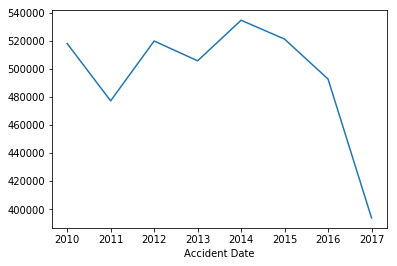

In [33]:
%matplotlib inline
yearlyClaims.plot()

Q3: What is the lag between Accident Year and Development Year for each row?

In [34]:
df['Report Date'] = pd.to_datetime(df['Report Date'])
df['Dev'] = df['Report Date'].dt.year - df['Accident Date'].dt.year + 1

In [35]:
df.head(3)

,Customer,State Code,Coverage,Education,Accident Date,Report Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Policy Type,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Dev
0,BU79786,KS,Basic,Bachelor,2013-09-08,2016-08-12,Employed,F,56274.0,Suburban,Married,Corporate Auto,Collision,Agent,384.811147,Two-Door Car,Medsize,4
1,QZ44356,NE,Extended,Bachelor,2017-01-15,2017-06-29,Unemployed,F,0.0,Suburban,Single,Personal Auto,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,OK,Premium,Bachelor,2010-04-28,2016-05-07,Employed,F,48767.0,Suburban,Married,Personal Auto,Collision,Agent,566.472247,Two-Door Car,Medsize,7


Q4: What is the trend in lag by Accident Year?

In [36]:
yearlyMeanLag = df['Dev'].groupby(df['Accident Date'].dt.year).mean()

In [37]:
yearlyMeanLag

Accident Date
2010    4.595781
2011    4.090909
2012    3.614796
2013    3.105820
2014    2.662857
2015    2.112676
2016    1.614796
2017    1.000000
Name: Dev, dtype: float64

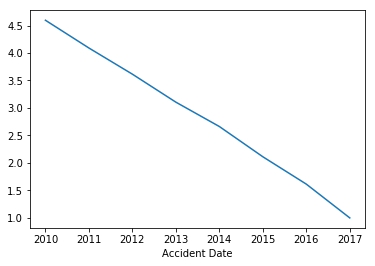

In [38]:
yearlyMeanLag.plot()

Q5: Create a cumulative loss triangle baseed on Accident Year.

In [39]:
reserveData = df['Total Claim Amount'].groupby([df['Accident Date'].dt.year, df['Dev']]).sum().reset_index()
reserveData

,Accident Date,Dev,Total Claim Amount
0,2010,1,42551.078385
1,2010,2,68909.783242
2,2010,3,76681.897528
3,2010,4,63665.470159
4,2010,5,78073.322851
5,2010,6,65058.965502
6,2010,7,74835.621515
7,2010,8,48168.059862
8,2011,1,34887.985767
9,2011,2,69851.524506


In [40]:
reserveData['Cumulative Claim Amount'] = reserveData['Total Claim Amount'].groupby(reserveData['Accident Date']).cumsum()
reserveData

,Accident Date,Dev,Total Claim Amount,Cumulative Claim Amount
0,2010,1,42551.078385,42551.078385
1,2010,2,68909.783242,111460.861627
2,2010,3,76681.897528,188142.759155
3,2010,4,63665.470159,251808.229314
4,2010,5,78073.322851,329881.552165
5,2010,6,65058.965502,394940.517667
6,2010,7,74835.621515,469776.139182
7,2010,8,48168.059862,517944.199044
8,2011,1,34887.985767,34887.985767
9,2011,2,69851.524506,104739.510273


In [41]:
cumTri = pd.pivot_table(reserveData, index = ["Accident Date"], columns = ["Dev"], values = ["Cumulative Claim Amount"]).round(2)
cumTri

Cumulative Claim Amount                                   \
Dev                                 1          2          3          4   
Accident Date                                                            
2010                         42551.08  111460.86  188142.76  251808.23   
2011                         34887.99  104739.51  191267.83  263463.17   
2012                         50759.10  153345.58  256680.56  359864.04   
2013                         62589.49  177980.59  289054.40  418991.37   
2014                         76690.51  237052.58  406268.22  534528.20   
2015                        107905.87  350337.46  521109.24        NaN   
2016                        194942.14  492652.61        NaN        NaN   
2017                        393765.79        NaN        NaN        NaN   

                                                          
Dev                    5          6          7         8  
Accident Date                                             
2010           329881.55  394940.52  469776.14  517944.2  
2011           344230.69  430438.59  477131.67       NaN  
2012           451690.53  519752.19        NaN       NaN  
2013           505634.39        NaN        NaN       NaN  
2014                 NaN        NaN        NaN       NaN  
2015                 NaN        NaN        NaN       NaN  
2016                 NaN        NaN        NaN       NaN  
2017                 NaN        NaN        NaN       NaN

Congrats! You have successfully built a traditional actuarial loss triangle using Python!

Q6: Policies from which state tend to produce higher claims on average?

In [42]:
df.groupby('State Code')['Total Claim Amount'].mean().sort_values(ascending=False)

State Code
OK    438.750566
MO    437.790032
KS    436.717765
IA    433.133581
NE    425.398069
Name: Total Claim Amount, dtype: float64

Q7: Calculate the average claims for each categorical field.

In [43]:
for col in list(df.columns[1:]):
    if df[col].dtype == np.object:
        print(df.groupby(col)['Total Claim Amount'].mean().sort_values(ascending=False))

State Code
OK    438.750566
MO    437.790032
KS    436.717765
IA    433.133581
NE    425.398069
Name: Total Claim Amount, dtype: float64
Coverage
Premium     651.740618
Extended    480.598969
Basic       379.078553
Name: Total Claim Amount, dtype: float64
Education
High School or Below    487.189739
Bachelor                428.130060
College                 423.850409
Master                  350.220079
Doctor                  338.186584
Name: Total Claim Amount, dtype: float64
EmploymentStatus
Unemployed       599.712084
Retired          489.901069
Disabled         474.711480
Medical Leave    471.842798
Employed         358.343927
Name: Total Claim Amount, dtype: float64
Gender
M    456.247609
F    412.927817
Name: Total Claim Amount, dtype: float64
Location Code
Suburban    562.215929
Urban       329.490422
Rural       109.861220
Name: Total Claim Amount, dtype: float64
Marital Status
Single      557.656343
Divorced    403.626139
Married     384.536239
Name: Total Claim Amount, dtype:

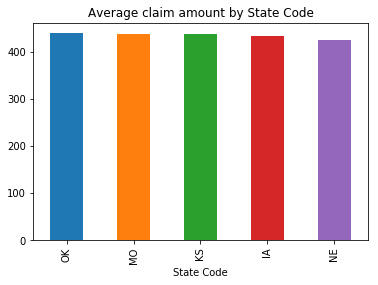

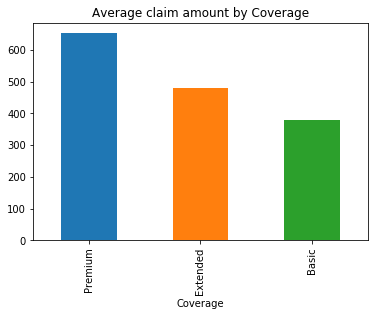

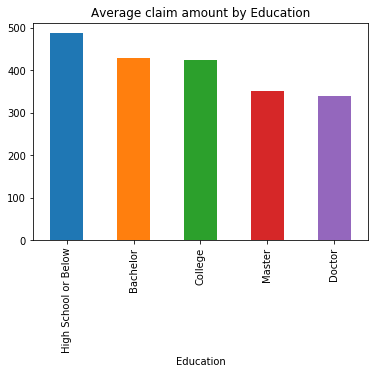

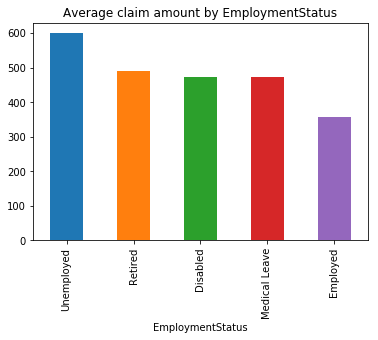

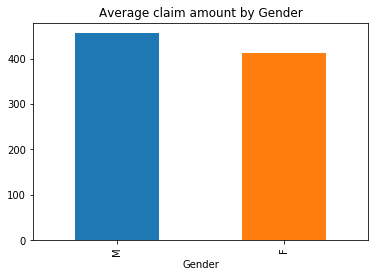

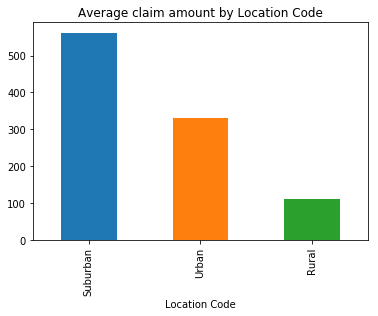

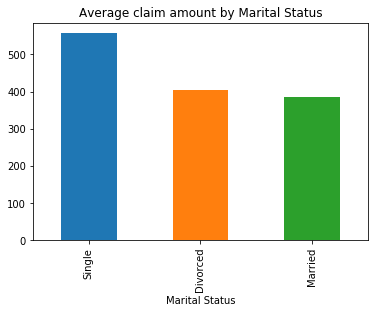

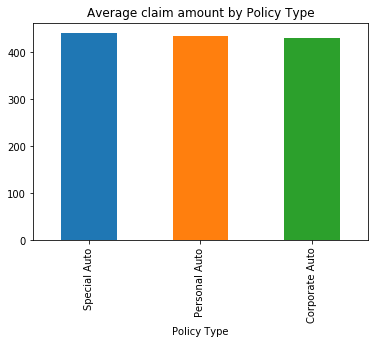

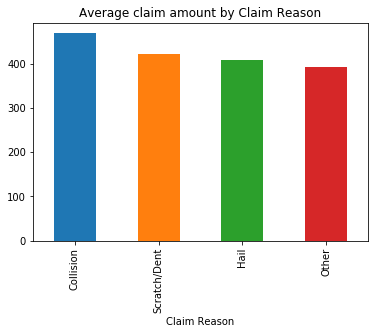

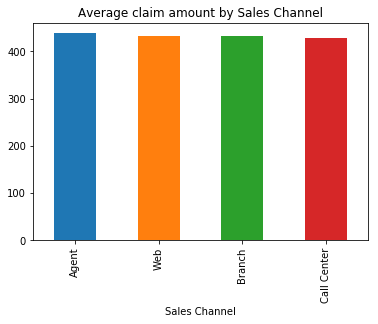

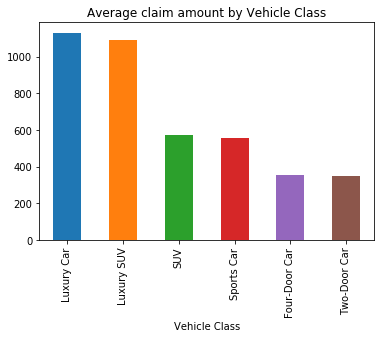

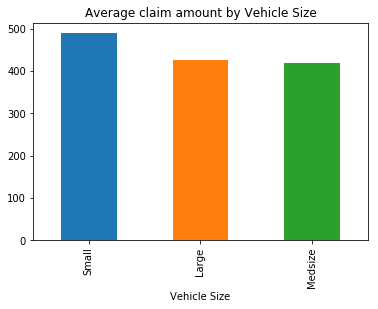

In [44]:
import matplotlib.pyplot as plt

for col in list(df.columns[1:]):
    if df[col].dtype == np.object:
        df.groupby(col)['Total Claim Amount'].mean().sort_values(ascending=False).plot(kind='bar',title = 'Average claim amount by {}'.format(col))
        plt.show()